# Compute count-in-cell density from a 2D catalog

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import scipy
from scipy.stats import norm, multivariate_normal
from pmesh import ParticleMesh

from densitysplit.cic_density import compute_cic_density, jax_cic_density

# to automatically reload imported modules when executing cell
%load_ext autoreload
%autoreload 2
    
plt.style.use(os.path.join(os.path.abspath(''), 'densitysplit.mplstyle'))
plt.rcParams["figure.autolayout"] = False

## Generate random catalog

In [2]:
boxsize = 100
boxcenter = 50
offset = boxcenter - boxsize/2 
smoothing_radius = 10
cellsize = 5
size = 10

rng = np.random.RandomState(seed=3)
positions = np.array([rng.uniform(0., 1., size)*b for b in (boxsize,)*2])

## Compute density mesh

In [6]:
mesh = jax_cic_density(positions, boxsize, boxcenter, cellsize, smoothing_radius, weights=None, return_counts=True)

Cellsize (5) is smaller than the smoothing diameter, shifting the mesh 4 times by 5 (main grid has cellsize 20).
main cellsize: 20
1.2566370614359172
Shifting the mesh by [0 0] cell units.
Shifting the mesh by [0 1] cell units.
Shifting the mesh by [0 2] cell units.
Shifting the mesh by [0 3] cell units.
Shifting the mesh by [1 0] cell units.
Shifting the mesh by [1 1] cell units.
Shifting the mesh by [1 2] cell units.
Shifting the mesh by [1 3] cell units.
Shifting the mesh by [2 0] cell units.
Shifting the mesh by [2 1] cell units.
Shifting the mesh by [2 2] cell units.
Shifting the mesh by [2 3] cell units.
Shifting the mesh by [3 0] cell units.
Shifting the mesh by [3 1] cell units.
Shifting the mesh by [3 2] cell units.
Shifting the mesh by [3 3] cell units.
painted mesh in elapsed time: 0.42589902877807617s
0.3175


In [7]:
print(np.sum(mesh))

127.0


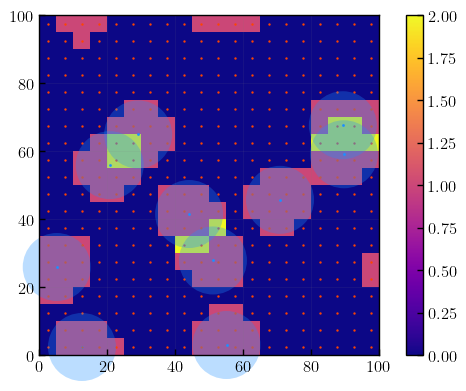

In [8]:
# Positions of the mesh nodes
meshpos = (0.5 + np.indices(mesh.value.shape)) * cellsize

plt.scatter(*positions, s=1)
plt.scatter(*meshpos, color='C1', s=0.5)
plt.imshow(mesh.value.T, origin='lower', extent=(0, boxsize, 0, boxsize))

ax = plt.gca()
for i in range(len(positions[0, :])):
    circle = plt.Circle(positions[:, i], smoothing_radius, clip_on=False, fill=True, facecolor='C0', alpha=0.3)
    ax.add_patch(circle)

plt.colorbar()
plt.show()